In [250]:
import numpy as np
import pulser
from pprint import pprint
import matplotlib.pyplot as plt

from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipEmulator
from pulser_simulation.simulation import Simulation
from pulser.devices import Chadoq2, MockDevice

In [252]:
# Parameters in rad/µs and ns
Omega = 2 * np.pi
U = 138
#U = Omega / 0.073

delta = 0.7 * 2*np.pi

#p = MockDevice._setattr_(interaction=3700)


rb = Chadoq2.rydberg_blockade_radius(U)

d = 5.3

AttributeError: 'VirtualDevice' object has no attribute '_setattr_'

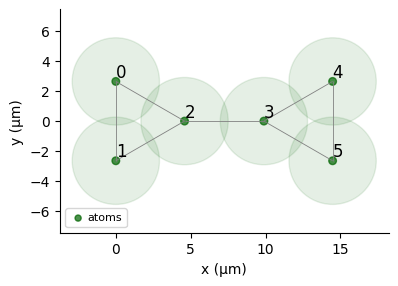

In [238]:

G1 = [(0,d/2),(0,-d/2),(d*np.sqrt(3)/2,0),(d*np.sqrt(3)/2+d,0),(d*np.sqrt(3)+d,d/2),(d*np.sqrt(3)+d,-d/2)]

qubits1 = dict(enumerate(G1))
B1 = [0,1,4,5]
C1 = [2,3]
reg1 = Register(qubits1)
reg1.draw(blockade_radius=rb, draw_half_radius=True, draw_graph=True)

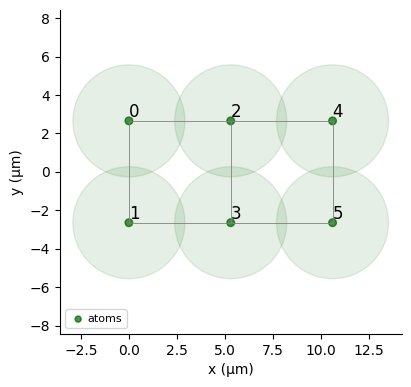

In [239]:
G2 = [(0,d/2),(0,-d/2),(d,d/2),(d,-d/2),(2*d,d/2),(2*d,-d/2)]

B2 = [0,1,4,5]
C2 = [2,3]

qubits2 = dict(enumerate(G2))
reg2 = Register(qubits2)

reg2.draw(blockade_radius=rb, draw_half_radius=True, draw_graph=True)

In [240]:
1000*np.linspace(0.1,2.5,25)
t_pulses = [Pulse.ConstantPulse(int(t),Omega,delta,0) for t in 1000*np.linspace(0.1,2.5,25)]


/Users/Brian/workspace/Research/CO2_Capture_GNN/.conda/lib/python3.10/site-packages/pulser/sequence/sequence.py:1281: UserWarning: A duration of 2199 ns is not a multiple of the channel's clock period (4 ns). It was rounded up to 2200 ns.
  self._add(pulse, channel, protocol)


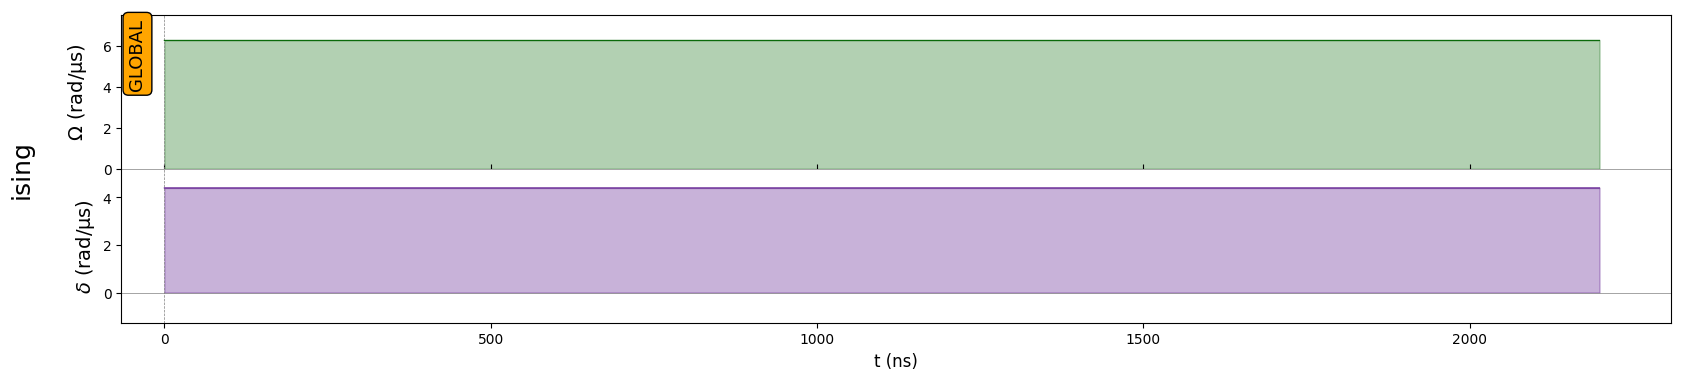

In [241]:
seq = Sequence(reg1, Chadoq2)

seq.declare_channel("ising", "rydberg_global")
#seq.available_channels

seq.add(t_pulses[-4],"ising")
#seq.measure(basis="ground-rydberg")
seq.draw()

In [242]:
seq.declared_channels

{'ising': Rydberg.Global(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 15.707963267948966 rad/µs, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg')}

In [243]:
sim = QutipEmulator.from_sequence(seq, sampling_rate=0.1)
#sim = Simulation(seq)

results = sim.run(progress_bar=True)
print(results.sample_final_state(N_samples=10000))
sim.show_config()

10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.02s. Est. time left: 00:00:00:00
30.0%. Run time:   0.05s. Est. time left: 00:00:00:00
40.0%. Run time:   0.06s. Est. time left: 00:00:00:00
50.0%. Run time:   0.08s. Est. time left: 00:00:00:00
60.0%. Run time:   0.09s. Est. time left: 00:00:00:00
70.0%. Run time:   0.10s. Est. time left: 00:00:00:00
80.0%. Run time:   0.11s. Est. time left: 00:00:00:00
90.0%. Run time:   0.12s. Est. time left: 00:00:00:00
Total run time:   0.26s
Counter({'000000': 2720, '001001': 850, '001010': 805, '010100': 798, '100100': 792, '100000': 576, '010000': 569, '000001': 549, '000010': 547, '100010': 491, '010001': 437, '100001': 406, '010010': 397, '001000': 36, '000100': 24, '000110': 1, '100110': 1, '101001': 1})
Options:
----------
Number of runs:        15
Samples per run:       5


In [244]:
N_samples = 10000
n_qubits = 6
_time = np.linspace(0.1,2.5,100)

count_dict = results.sample_final_state(N_samples=N_samples)

n1_B = np.zeros(len(_time))
n1_C = np.zeros(len(_time))
n2_B = np.zeros(len(_time))
n2_C = np.zeros(len(_time))


for i,t in enumerate(1000*_time):

    t_pulse = Pulse.ConstantPulse(int(t),Omega,delta,0)
    seq = Sequence(reg1, Chadoq2)
    seq.declare_channel("ising", "rydberg_global")
    seq.add(t_pulse,"ising")

    sim = QutipEmulator.from_sequence(seq, sampling_rate=.1)
    results = sim.run(progress_bar=False)
    count_dict = results.sample_final_state(N_samples=N_samples)

    for el,count in count_dict.items():
        for j,qubitval in enumerate(el[::-1]):
            if j in B1 and qubitval=="1":
                n1_B[i] += count / N_samples / len(B1)
            elif j in C1 and qubitval=="1":
                n1_C[i] += count / N_samples / len(C1)

    seq = Sequence(reg2, Chadoq2)
    seq.declare_channel("ising", "rydberg_global")
    seq.add(t_pulse,"ising")

    sim = QutipEmulator.from_sequence(seq, sampling_rate=.1)
    results = sim.run(progress_bar=False)
    count_dict = results.sample_final_state(N_samples=N_samples)

    for el,count in count_dict.items():
        for j,qubitval in enumerate(el[::-1]):
            if j in B2 and qubitval=="1":
                n2_B[i] += count / N_samples / len(B2)
            elif j in C2 and qubitval=="1":
                n2_C[i] += count / N_samples / len(C2)



/Users/Brian/workspace/Research/CO2_Capture_GNN/.conda/lib/python3.10/site-packages/pulser/sequence/sequence.py:1281: UserWarning: A duration of 221 ns is not a multiple of the channel's clock period (4 ns). It was rounded up to 224 ns.
  self._add(pulse, channel, protocol)
/Users/Brian/workspace/Research/CO2_Capture_GNN/.conda/lib/python3.10/site-packages/pulser/sequence/sequence.py:1281: UserWarning: A duration of 245 ns is not a multiple of the channel's clock period (4 ns). It was rounded up to 248 ns.
  self._add(pulse, channel, protocol)
/Users/Brian/workspace/Research/CO2_Capture_GNN/.conda/lib/python3.10/site-packages/pulser/sequence/sequence.py:1281: UserWarning: A duration of 269 ns is not a multiple of the channel's clock period (4 ns). It was rounded up to 272 ns.
  self._add(pulse, channel, protocol)
/Users/Brian/workspace/Research/CO2_Capture_GNN/.conda/lib/python3.10/site-packages/pulser/sequence/sequence.py:1281: UserWarning: A duration of 293 ns is not a multiple of th

In [245]:
print(n1_B)

[0.081625 0.1163   0.158975 0.1989   0.237725 0.271025 0.29425  0.30565
 0.30695  0.3006   0.287225 0.264575 0.238175 0.20585  0.171375 0.140125
 0.1103   0.083875 0.06385  0.056175 0.055925 0.063575 0.07765  0.09975
 0.12715  0.15355  0.18595  0.213125 0.240675 0.263925 0.27275  0.28105
 0.2874   0.27925  0.26385  0.24525  0.217775 0.190225 0.152125 0.129075
 0.099975 0.07855  0.064725 0.056625 0.057125 0.0633   0.076975 0.093825
 0.112125 0.13555  0.158925 0.179025 0.1974   0.21445  0.231125 0.237625
 0.248425 0.24675  0.247725 0.24345  0.236425 0.225425 0.215525 0.204375
 0.188175 0.172175 0.165675 0.152625 0.1379   0.133225 0.1229   0.12335
 0.12415  0.12395  0.132275 0.1422   0.154225 0.174525 0.186225 0.2007
 0.21645  0.229175 0.23845  0.24225  0.2414   0.239825 0.22795  0.215475
 0.2017   0.1818   0.160225 0.139575 0.118225 0.101275 0.082325 0.0656
 0.0558   0.054625 0.05655  0.06885 ]


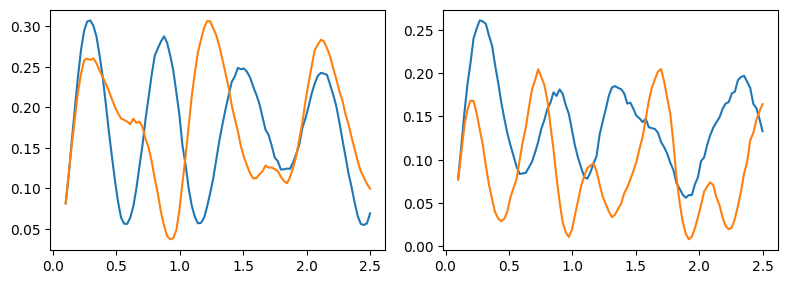

In [246]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(8,3))
plt.tight_layout()

ax1.plot(_time,n1_B)
ax1.plot(_time,n2_B)

ax2.plot(_time,n1_C)
ax2.plot(_time,n2_C)